# 3. Community Detection

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import networkx as nx

# load
df_ending = pd.read_csv('../data/aot_ending.csv')
df_comments = pd.read_csv('../data/comments_graph_ending_clean.csv')
G = pickle.load(open('../data/comments_graph_full.pickle', 'rb'))

In [4]:
def community_detection(G, c):
    """
    Community detection utility function
    """
    # number of communities
    print("Number of communities: ", len(c), end="\n\n")

    # size of communities
    community_sizes = [len(community) for community in c]
    for i, size in enumerate(community_sizes, 1):
        print(f"Community {i:>2}: Size {size}")

    # modularity
    print(f"\nModularity: {nx.community.modularity(G, c):.4f}")

    ######
    # create a DataFrame node-community
    l=[]
    i=0

    for community in c:
        for node in community:
            l.append([node,i])
        i+=1

    # create DataFrame
    # IMPORTANT: the order of nodes in the DataFrame is the same as in G.nodes()
    # so we match the communities to the nodes in the graph, for example for the color in the plot
    df = pd.DataFrame(l, columns=['node', 'community'])
    df = df.set_index('node').reindex(G.nodes()).reset_index()

    return df


In [3]:
pos = nx.spring_layout(G, iterations=50)


### Greedy modularity

In [6]:
c_greedy = nx.community.greedy_modularity_communities(G)
df_greedy = community_detection(G, c_greedy)
display(df_greedy.head(7))

Number of communities:  161

Community  1: Size 3334
Community  2: Size 1108
Community  3: Size 837
Community  4: Size 827
Community  5: Size 648
Community  6: Size 441
Community  7: Size 287
Community  8: Size 269
Community  9: Size 242
Community 10: Size 193
Community 11: Size 164
Community 12: Size 114
Community 13: Size 109
Community 14: Size 102
Community 15: Size 97
Community 16: Size 89
Community 17: Size 85
Community 18: Size 82
Community 19: Size 55
Community 20: Size 49
Community 21: Size 43
Community 22: Size 37
Community 23: Size 19
Community 24: Size 18
Community 25: Size 17
Community 26: Size 15
Community 27: Size 15
Community 28: Size 13
Community 29: Size 13
Community 30: Size 12
Community 31: Size 12
Community 32: Size 12
Community 33: Size 11
Community 34: Size 10
Community 35: Size 9
Community 36: Size 8
Community 37: Size 7
Community 38: Size 7
Community 39: Size 6
Community 40: Size 6
Community 41: Size 5
Community 42: Size 5
Community 43: Size 5
Community 44: Size

,node,community
0,joaopaulofoo,8
1,Umer123321,8
2,ashai1994,8
3,Jdep11,8
4,LordNelson27,8
5,Alderdash,8
6,lasnoopacabra,8


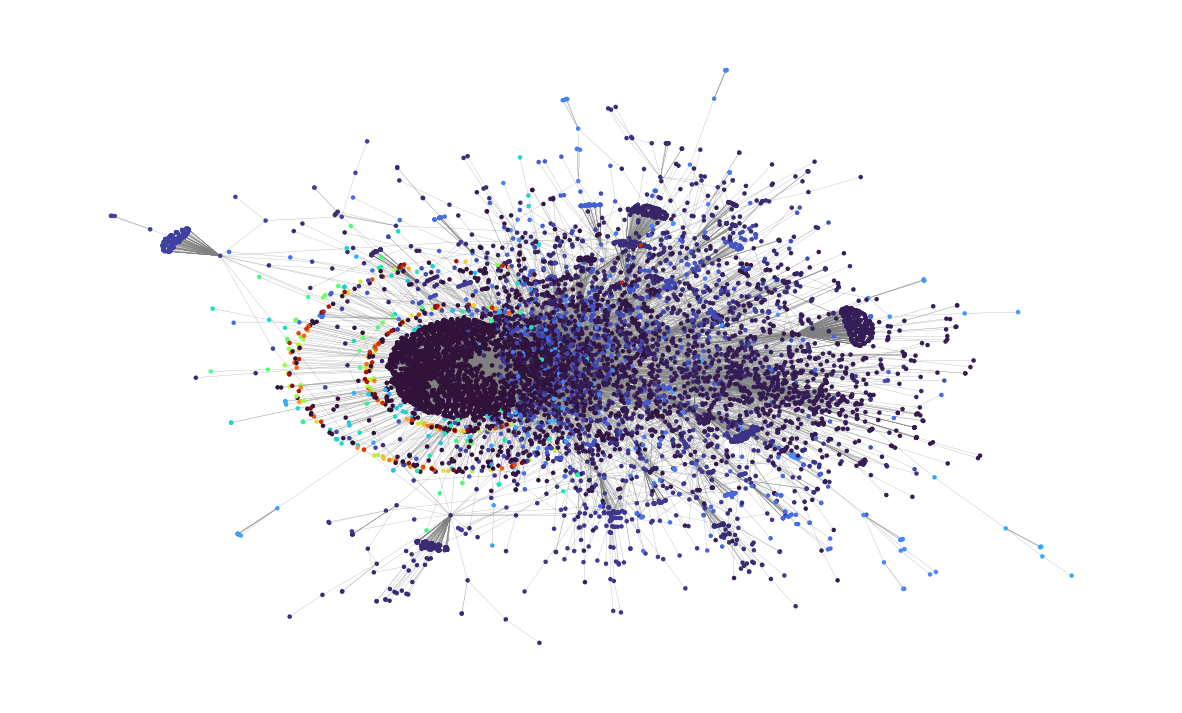

In [7]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df_greedy['community'], cmap=plt.cm.turbo, edge_color='gray', node_size=5, with_labels=False, width=0.15)

### Louvain

Number of communities:  53

Community  1: Size 392
Community  2: Size 200
Community  3: Size 159
Community  4: Size 241
Community  5: Size 214
Community  6: Size 82
Community  7: Size 3
Community  8: Size 116
Community  9: Size 175
Community 10: Size 479
Community 11: Size 3
Community 12: Size 4
Community 13: Size 569
Community 14: Size 78
Community 15: Size 16
Community 16: Size 3
Community 17: Size 102
Community 18: Size 223
Community 19: Size 3
Community 20: Size 3
Community 21: Size 557
Community 22: Size 5
Community 23: Size 221
Community 24: Size 250
Community 25: Size 193
Community 26: Size 3
Community 27: Size 3
Community 28: Size 84
Community 29: Size 465
Community 30: Size 260
Community 31: Size 9
Community 32: Size 4
Community 33: Size 278
Community 34: Size 66
Community 35: Size 105
Community 36: Size 2940
Community 37: Size 7
Community 38: Size 3
Community 39: Size 4
Community 40: Size 72
Community 41: Size 3
Community 42: Size 3
Community 43: Size 3
Community 44: Size 5
C

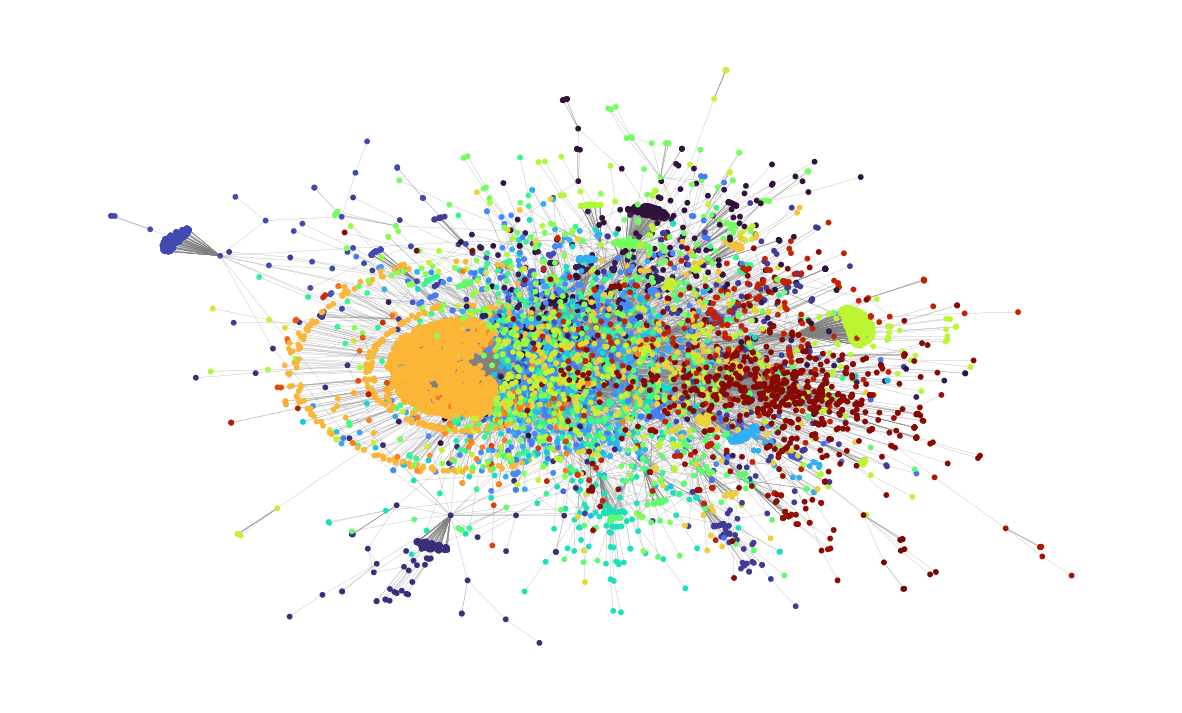

In [8]:
c_louvain = nx.community.louvain_communities(G)
df_louvain = community_detection(G, c_louvain)

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df_louvain['community'], cmap=plt.cm.turbo, edge_color='gray', node_size= 10, with_labels= False, width= 0.15)

### FluidC

In [9]:
k_to_modularity = {}
for k in range(1, 26):
    c = list(nx.community.asyn_fluidc(G, k))
    modularity = nx.community.modularity(G, c)
    k_to_modularity[k] = modularity
    print(f"#communities = {k}, Modularity = {modularity:.4f}")

#communities = 1, Modularity = 0.0000
#communities = 2, Modularity = 0.3880
#communities = 3, Modularity = 0.5046
#communities = 4, Modularity = 0.5551
#communities = 5, Modularity = 0.5183
#communities = 6, Modularity = 0.5278
#communities = 7, Modularity = 0.6107
#communities = 8, Modularity = 0.5472
#communities = 9, Modularity = 0.5606
#communities = 10, Modularity = 0.4891
#communities = 11, Modularity = 0.5255
#communities = 12, Modularity = 0.5873
#communities = 13, Modularity = 0.5143
#communities = 14, Modularity = 0.5552
#communities = 15, Modularity = 0.5279
#communities = 16, Modularity = 0.5129
#communities = 17, Modularity = 0.5202
#communities = 18, Modularity = 0.5105
#communities = 19, Modularity = 0.5951
#communities = 20, Modularity = 0.4731
#communities = 21, Modularity = 0.5107
#communities = 22, Modularity = 0.5013
#communities = 23, Modularity = 0.4953
#communities = 24, Modularity = 0.5133
#communities = 25, Modularity = 0.5185


Number of communities:  7

Community  1: Size 1305
Community  2: Size 1398
Community  3: Size 988
Community  4: Size 905
Community  5: Size 2155
Community  6: Size 1095
Community  7: Size 1874

Modularity: 0.5453


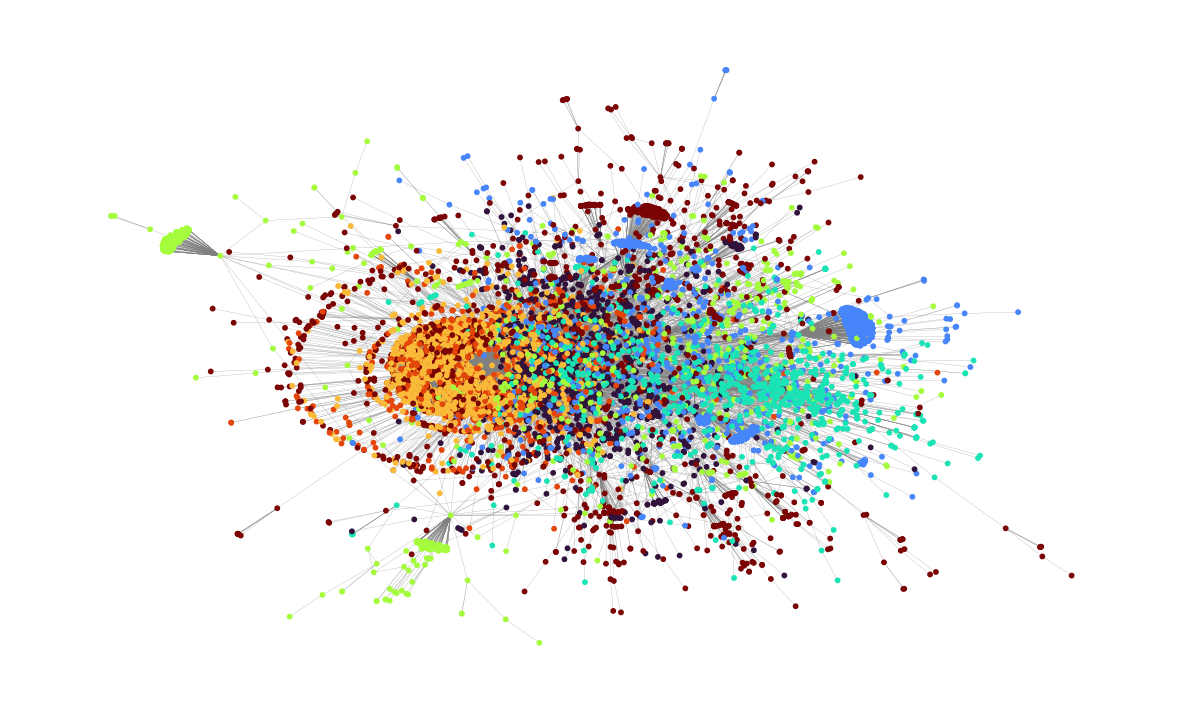

In [10]:
# the best k is the one with the highest modularity
top_k = max(k_to_modularity, key=k_to_modularity.get)
c_fluidc = list(nx.community.asyn_fluidc(G, k=top_k))
df_fluidc = community_detection(G, c_fluidc)

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df_fluidc['community'], cmap=plt.cm.turbo, edge_color='gray', node_size= 10, with_labels= False, width= 0.15)

We tried also Fluidc for showing that it is not suited when we have a big difference in size between divisive subgroups. This is given from his nature as an algorithm, since to each community is given a limited amount of resources.

## Infomap

In [11]:
# Create node mapping from string to integer
node_to_id = {node: i for i, node in enumerate(G.nodes())}

from infomap import Infomap
im = Infomap()
# Add nodes and edges to Infomap
for node in G.nodes():
    im.add_node(node_to_id[node])

for u, v in G.edges():
    im.add_link(node_to_id[u], node_to_id[v])

im.run()

# Create reverse mapping for partition
id_to_node = {i: node for node, i in node_to_id.items()}
partition = {id_to_node[node.node_id]: node.module_id for node in im.iterLeafNodes()}


  Infomap v2.8.0 starts at 2025-06-05 11:27:15
  -> Input network: 
  -> No file output!
  OpenMP 201511 detected with 16 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 9720 nodes and 13850 links...
  -> One-level codelength: 10.8789937

Trial 1/1 starting at 2025-06-05 11:27:15
Two-level compression: 34% 0.24% 0.0324417113% 
Partitioned to codelength 2.30741211 + 4.81338572 = 7.120797832 in 683 modules.
Super-level compression: 1.87311385% to codelength 6.987417182 in 14 top modules.

Recursive sub-structure compression: 25.372028% 0.352316931% 0% . Found 4 levels with codelength 6.925613976

=> Trial 1/1 finished in 0.105359718s with codelength 6.92561398


Summary after 1 trial
Best end modular solution in 4 levels:
Per level number of modules:         [         14,         827

In [12]:
# Convert partition dictionary to communities list format for community_detection function
communities = []
partition_values = set(partition.values())

for community_id in sorted(partition_values):
    community_nodes = [node for node, comm_id in partition.items() if comm_id == community_id]
    communities.append(community_nodes)

df_infomap = community_detection(G, communities)

Number of communities:  14

Community  1: Size 6327
Community  2: Size 778
Community  3: Size 463
Community  4: Size 292
Community  5: Size 372
Community  6: Size 269
Community  7: Size 270
Community  8: Size 262
Community  9: Size 206
Community 10: Size 176
Community 11: Size 98
Community 12: Size 79
Community 13: Size 79
Community 14: Size 49

Modularity: 0.4982


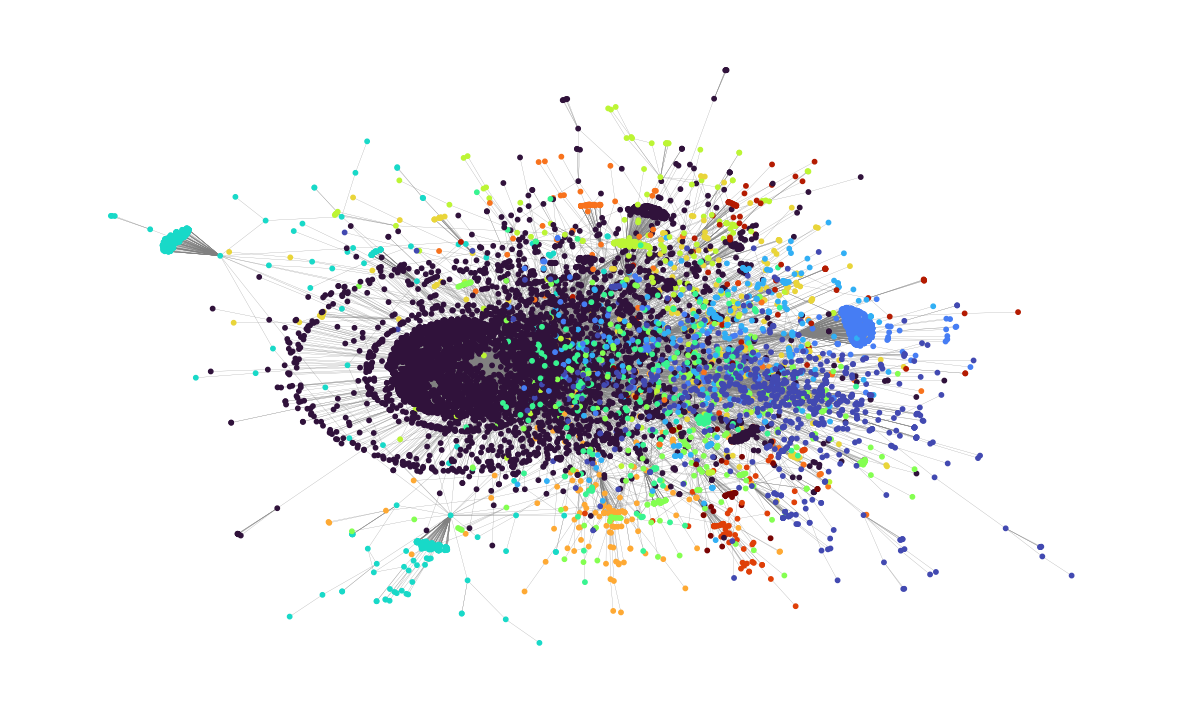

In [13]:
node_color = [partition[node] for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=node_color, cmap=plt.cm.turbo, edge_color='gray', node_size=10, with_labels=False, width=0.15)